# Machine Learning Capstone Project
## Using Regression on Appliance Energy Prediction

In [1]:
#importing librabries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Load and Read Data

In [2]:
# import csv file containing data and read it
df = pd.read_csv('energydata_complete.csv')
# diplay the first 5 rows of the data that is going to be used
pd.options.display.max_columns=None
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


The information contained in this data set provides energy consumption records of Appliances in the house, the temperatures and humidity inside the house rooms and outside environment as obtained from a nearby weather station, other records include the Windspeed, Visibility, Tdewpoint, pressure together with random variables rv1, and rv2.
Observations are recorded in duration of 10 minutes for a period of about 4.5 months.
### The goal in this project is to predict the Appliances' energy using the provided attributes

In [3]:
#create a train set and test set from the split
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(df.shape)
print(train_set.shape, test_set.shape)

(19735, 29)
(15788, 29) (3947, 29)


## Exploratory analysis

In [4]:
print(df.describe())

         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

#### From the descriptions from the dataset it can be noted that:
* there are no missing values in all attributes 
* there are outliers in some attributes which will be examined later on
* Because its not a time series project the date will be dropped from the dataset
* lights attribute has a unique description with zero for all percentiles unlike other attributes, this will be exploited more later

In [6]:
print(df['lights'].value_counts())

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64


Lights has almost all its values 0, this may have less impact to the prediction its wise not to consider it so it will be dropped

## Data Visualization
* split the data and use only train data for all visualizations 
* examine the correlation effects
* explore the outliers
* check on skewness of the attributes

### Correlation displays
#### Temperature sensors

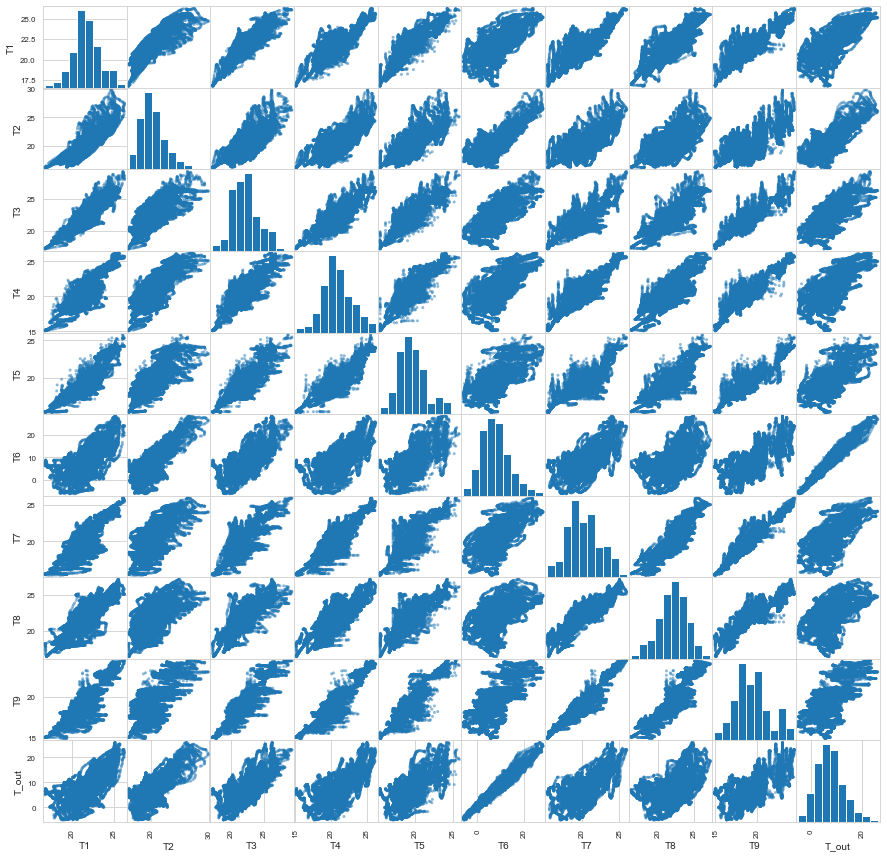

In [7]:
#create a copy of the train data to be used for visualizations
# for clear vissualizations, input features are divided into, temp, humidity and others columns.
df = train_set.copy()
df.drop('date',1, inplace=True)
temp_cols = [ 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out']
humidity_cols =['RH_1', 'RH_2','RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7','RH_8', 'RH_9', 'RH_out' ]
other_cols =['Appliances', 'lights', 'Press_mm_hg', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2']
pd.plotting.scatter_matrix(df[temp_cols], figsize=(15,15))
plt.show()

We can identify significant correlations between:
* T_out and T6
* T9 and T7

#### Humidity sensors

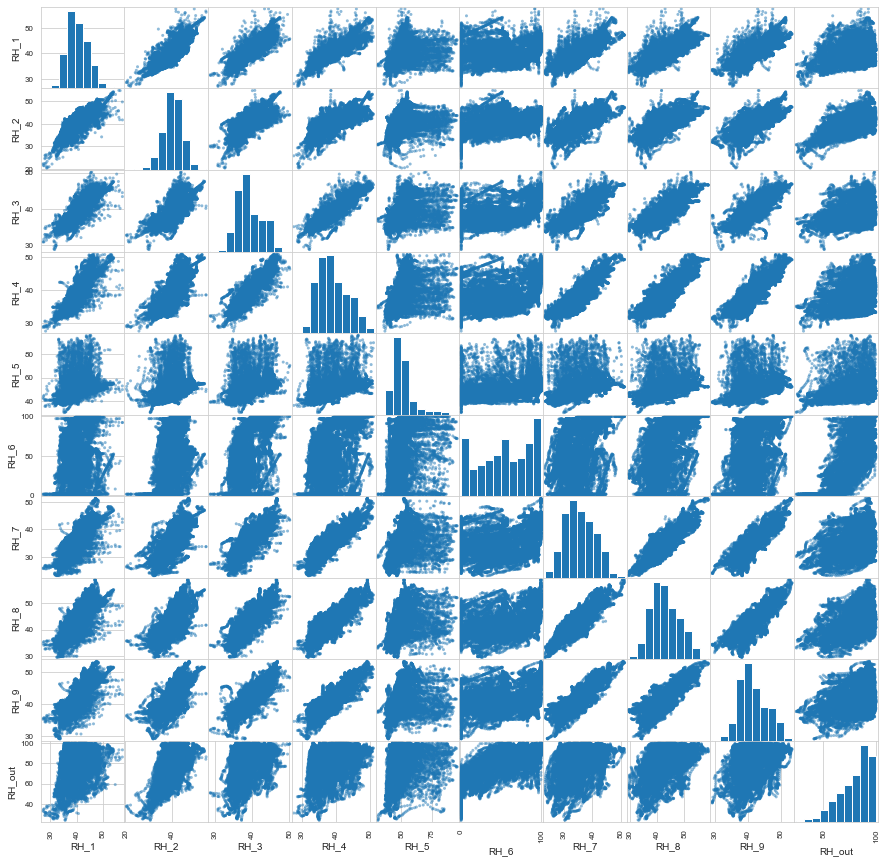

In [8]:
pd.plotting.scatter_matrix(df[humidity_cols], figsize=(15,15))
plt.show()

there seems to be significant correlations between:
* RH_3 and RH_4
* RH_7 and RH_8
this will be numerically determined later to decide whether it could affect the predictions

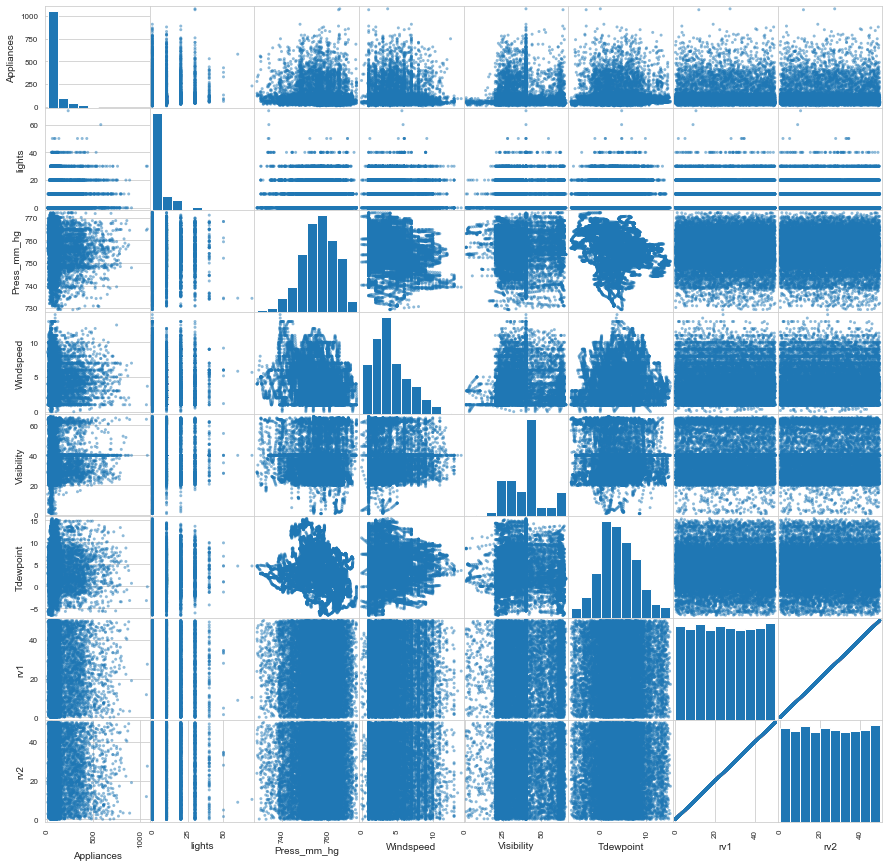

In [9]:
pd.plotting.scatter_matrix(df[other_cols], figsize=(15,15))
plt.show()

There is a visible high correlation between the random variables rv1 and rv2 besides that the rest of the features are completely uncorrelated.

### heatmap

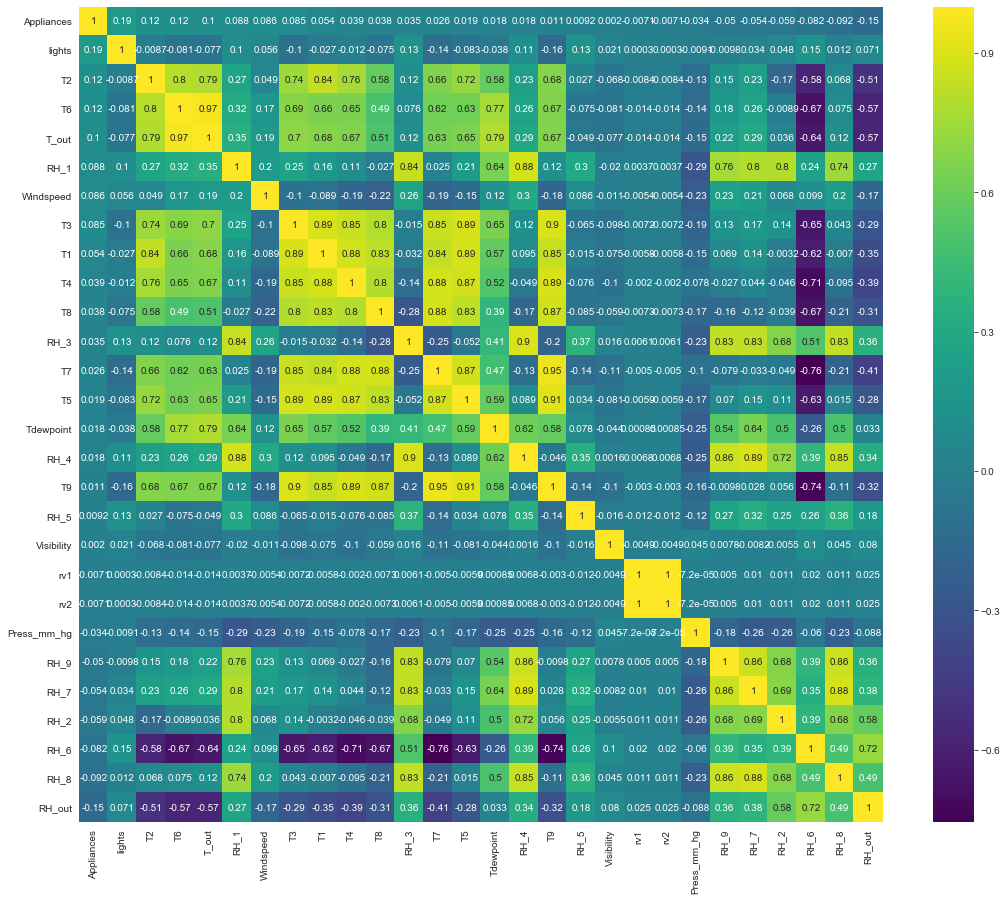

In [10]:

k=29
cols = df.corr().nlargest(k, 'Appliances')['Appliances'].index
cm = df[cols].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(cm, cmap='viridis', annot=True)
plt.show()

In [11]:
#function to identify highly correlated attributes
def get_corr_attrs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    to_drop = []
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            to_drop.append((cols[i], cols[j]))
    return to_drop

def get_high_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_corr_attrs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("High Correlations")
print(get_high_correlations(df, 25))

High Correlations
rv1   rv2      1.000000
T6    T_out    0.974923
T7    T9       0.945294
T5    T9       0.911297
T3    T9       0.902660
RH_3  RH_4     0.899453
RH_4  RH_7     0.894638
T1    T3       0.892569
T4    T9       0.891041
T3    T5       0.888816
T1    T5       0.886223
RH_7  RH_8     0.883542
T7    T8       0.883534
RH_1  RH_4     0.880480
T4    T7       0.879771
T1    T4       0.878034
T4    T5       0.873178
T5    T7       0.871509
T8    T9       0.870747
RH_7  RH_9     0.858456
RH_8  RH_9     0.856453
RH_4  RH_9     0.856087
T3    T4       0.853868
      T7       0.849634
RH_4  RH_8     0.848063
dtype: float64


There is very high correlation between the following pairs with over 0.9:
* rv1 with rv2
* T6 with T_out
* T7 and T5, with T9
* RH_3 and RH_4
so drop features rv2,T_out, T9, RH_4, because they will be of very less impact on the target since their contribution will be well represented with their corresponding correlated attributes.

### checking for outliers and skewness

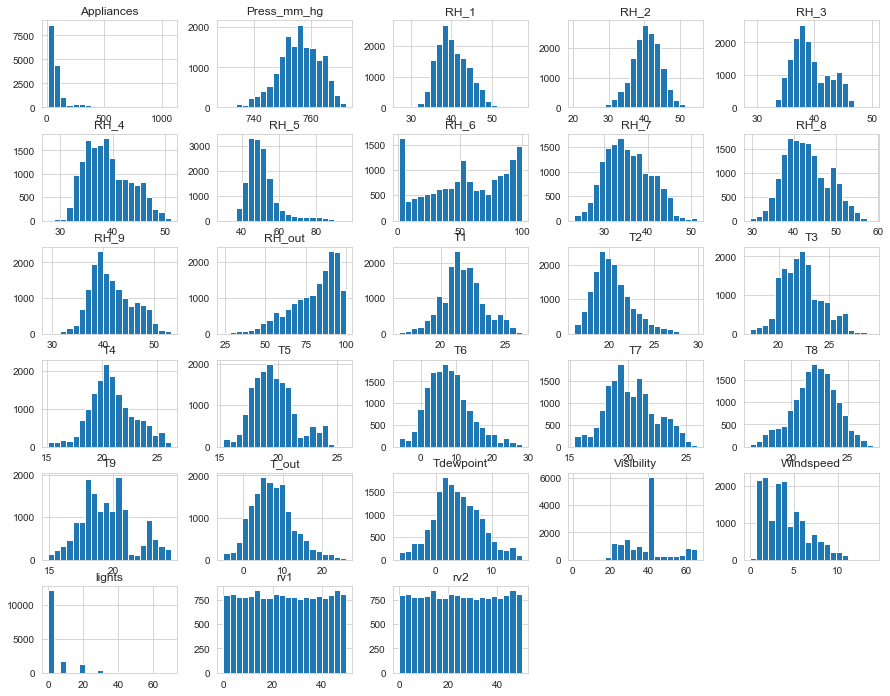

In [12]:
df.hist(bins=20, figsize=(15,12))
plt.show()

Note that all the graphs appear normally distributed apart from the following:
* rv1, rv2, lights, visibility,windspeed, RH_out, RH_6, RH_5, Appliances graphs are skewed and there could be some outliers to be removed later.
* lights and RH_out graphs are skewed same way as the target. We will analyse if there exists linearity the target and some of the attributes.

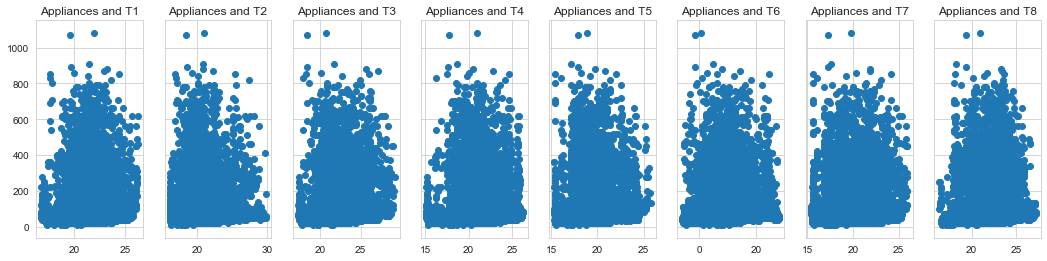

In [13]:
f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8) = plt.subplots(1,8, sharey=True, figsize=(18,4))
ax1.scatter(df['T1'], df['Appliances'])
ax1.set_title('Appliances and T1')

ax2.scatter(df['T2'], df['Appliances'])
ax2.set_title('Appliances and T2')

ax3.scatter(df['T3'], df['Appliances'])
ax3.set_title('Appliances and T3')

ax4.scatter(df['T4'], df['Appliances'])
ax4.set_title('Appliances and T4')

ax5.scatter(df['T5'], df['Appliances'])
ax5.set_title('Appliances and T5')

ax6.scatter(df['T6'], df['Appliances'])
ax6.set_title('Appliances and T6')

ax7.scatter(df['T7'], df['Appliances'])
ax7.set_title('Appliances and T7')

ax8.scatter(df['T8'], df['Appliances'])
ax8.set_title('Appliances and T8')

plt.show()

Its so obvious there is no linear relationship between the target and the attributes used as observed above, we are going to use a log transformation to attain normalization and remove the skewness. Note that the none linearity could also be deduced from the Appliances histogram or distplot below where Appliances graph is skewed on one side.

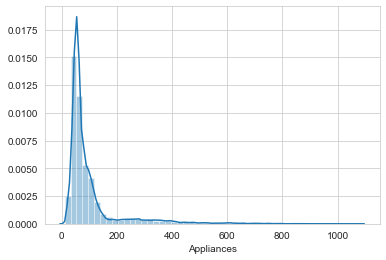

In [14]:
sns.distplot(df['Appliances'])
plt.show()

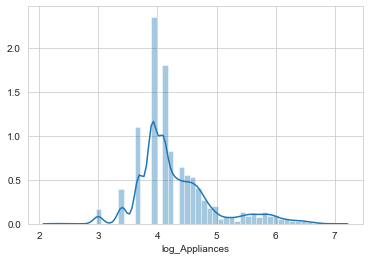

In [15]:
df['log_Appliances'] = np.log(df['Appliances'])
sns.distplot(df['log_Appliances'])
plt.show()

After the transformation, skewness can still be observed but its a little reduced and the graph is almost normally distributed. So we will drop the Appliances target in our dataset and use the log transformed target 'log_Appliances'

['T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5' 'T6' 'RH_6'
 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out' 'Press_mm_hg' 'RH_out'
 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2']


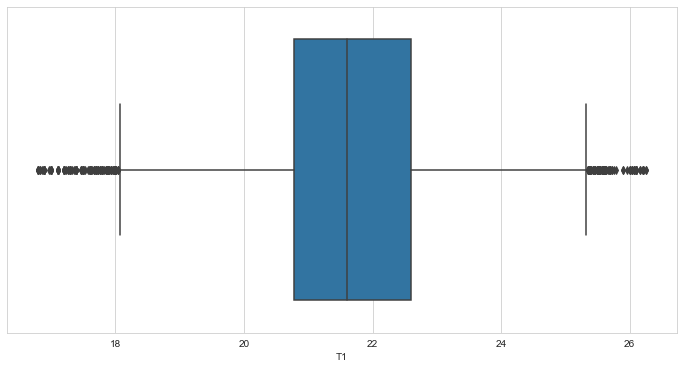

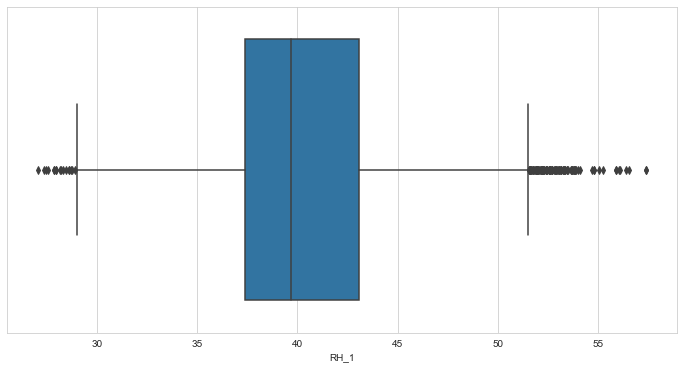

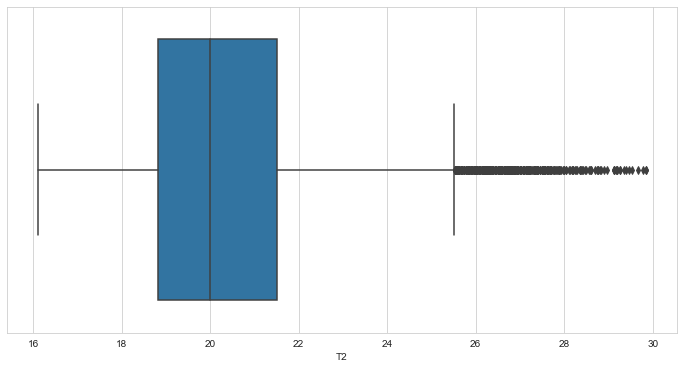

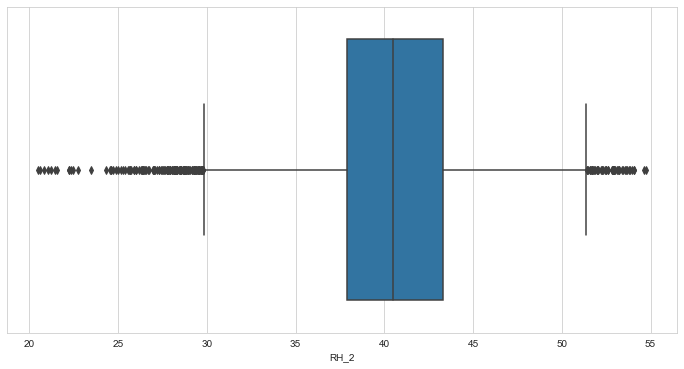

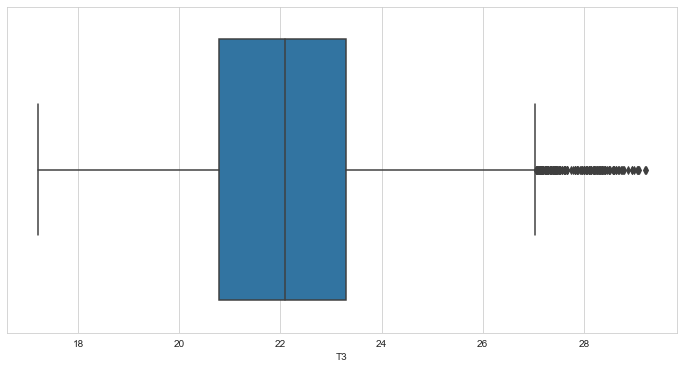

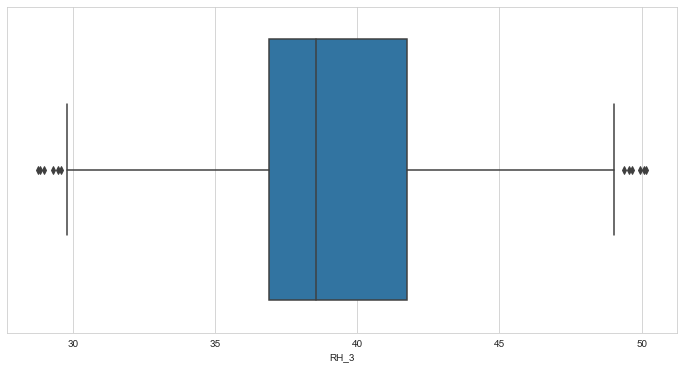

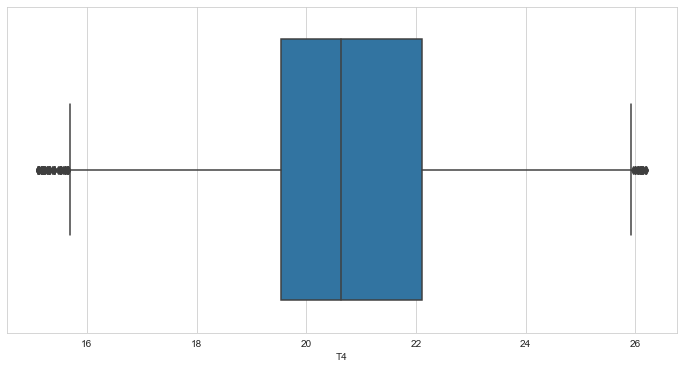

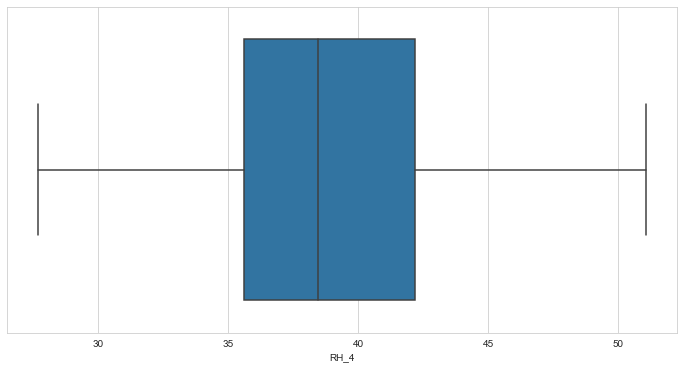

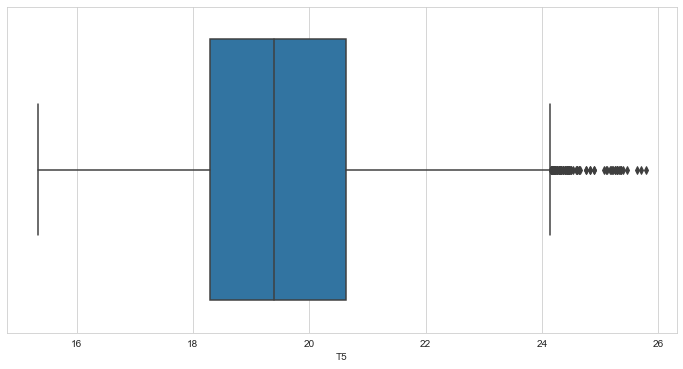

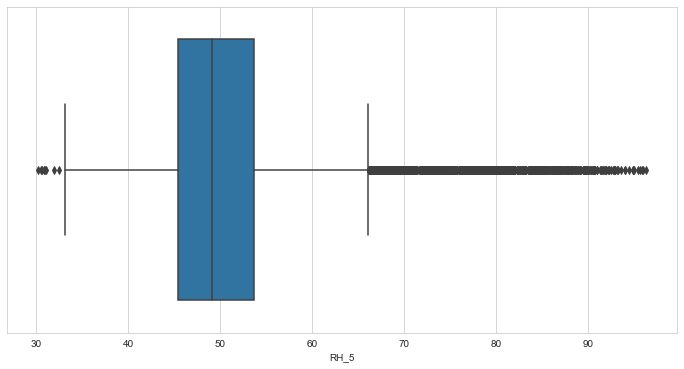

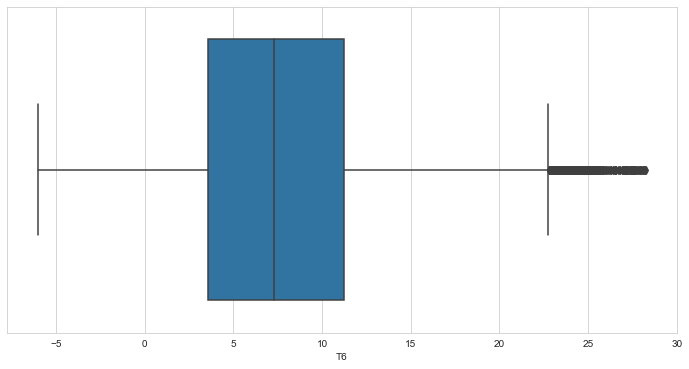

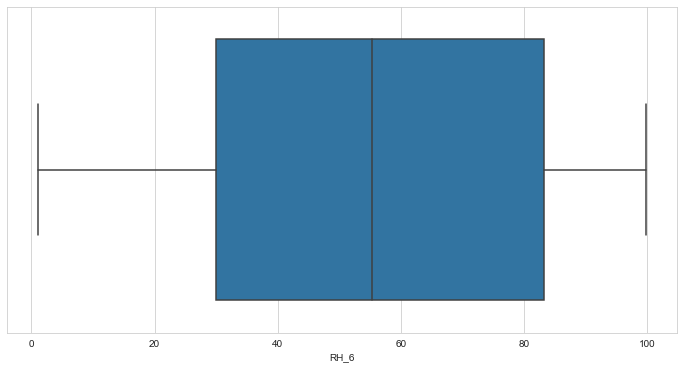

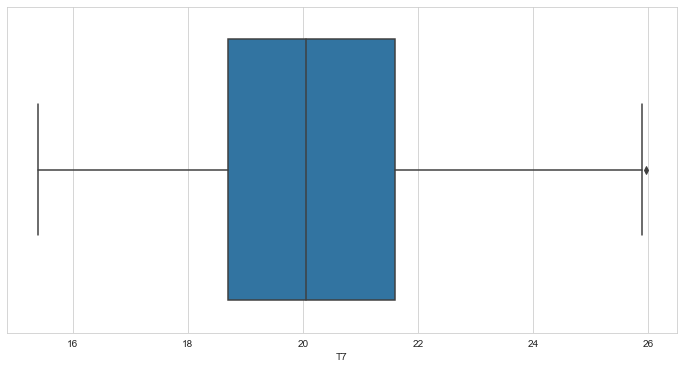

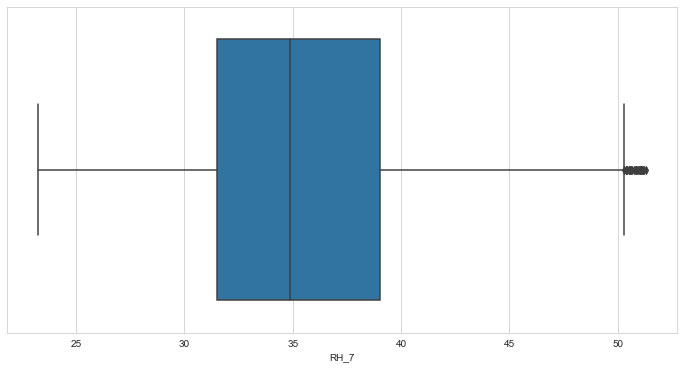

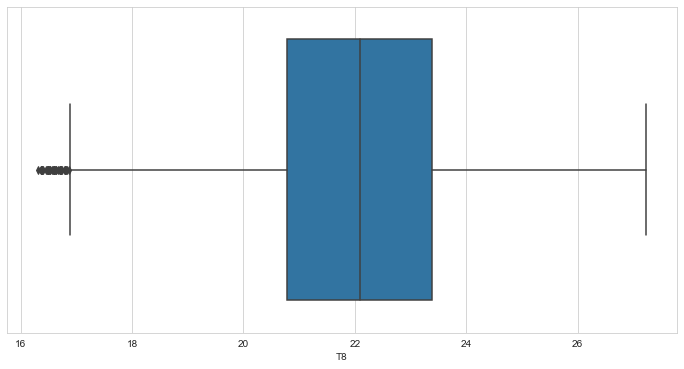

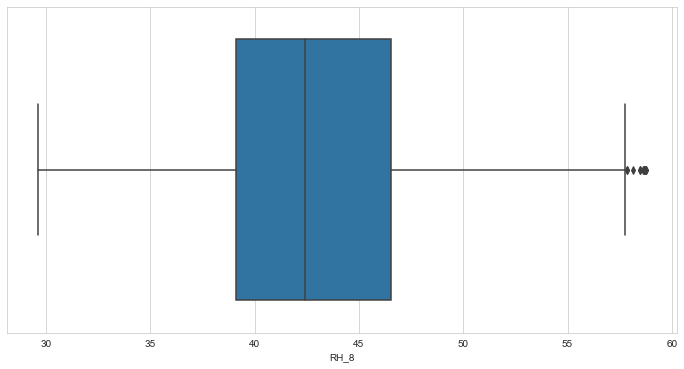

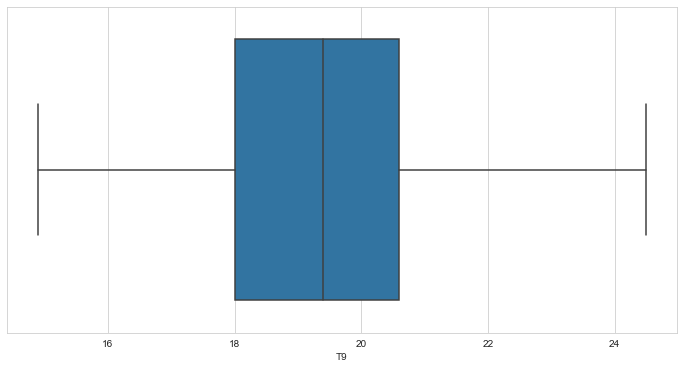

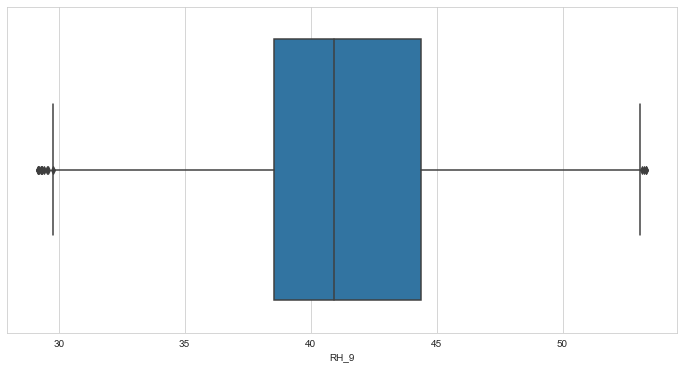

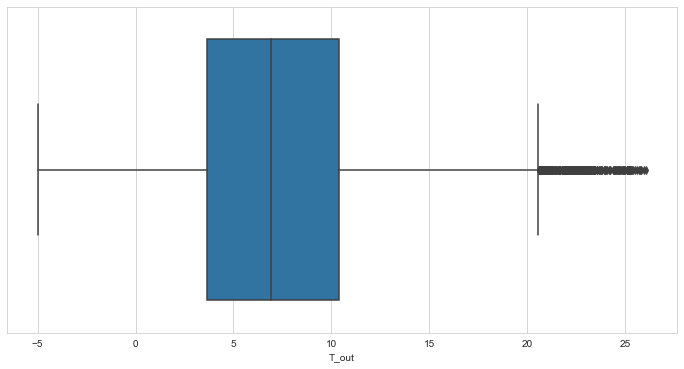

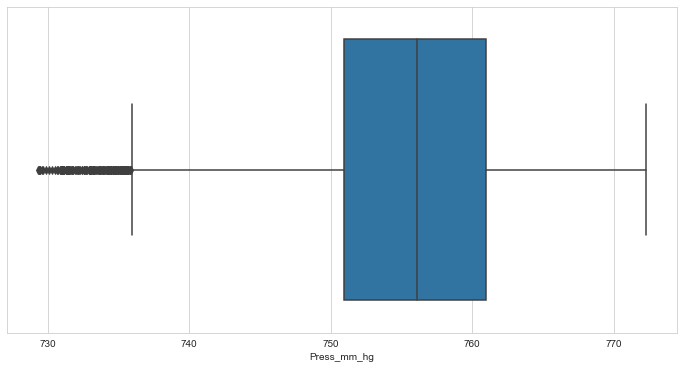

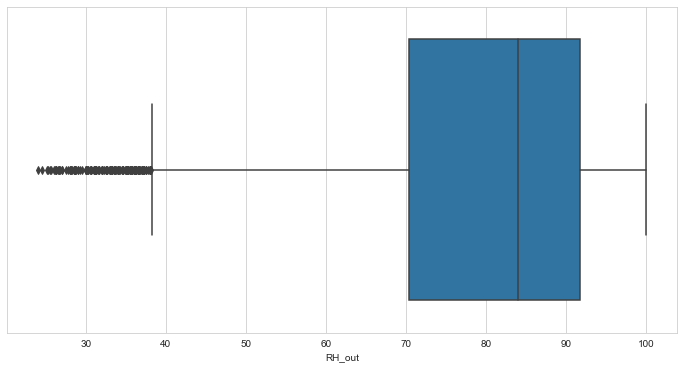

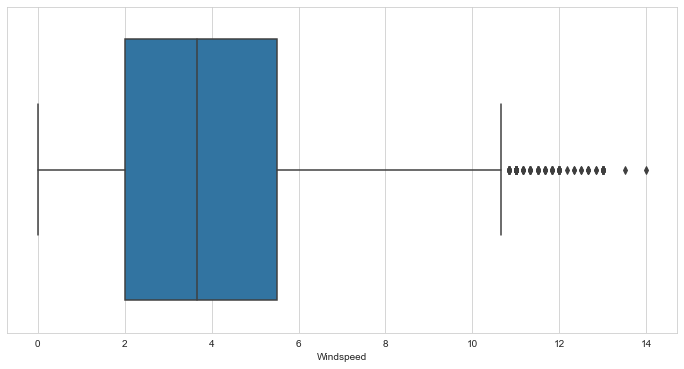

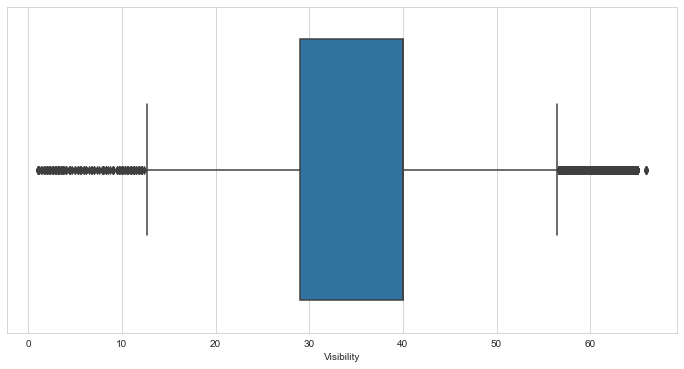

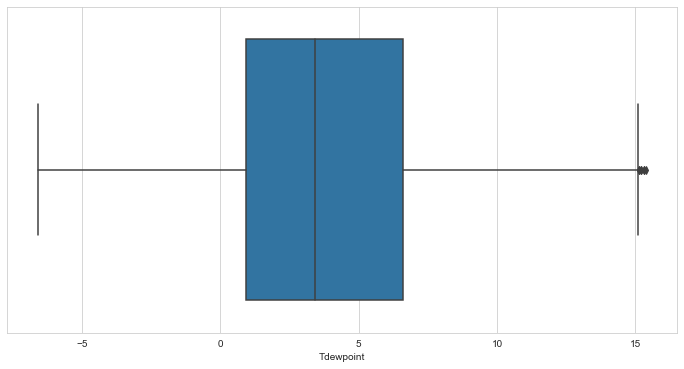

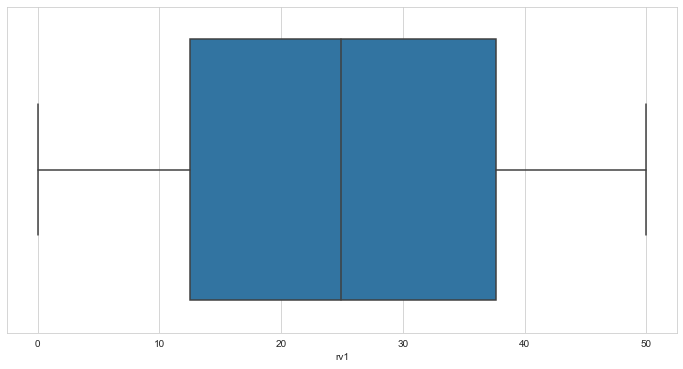

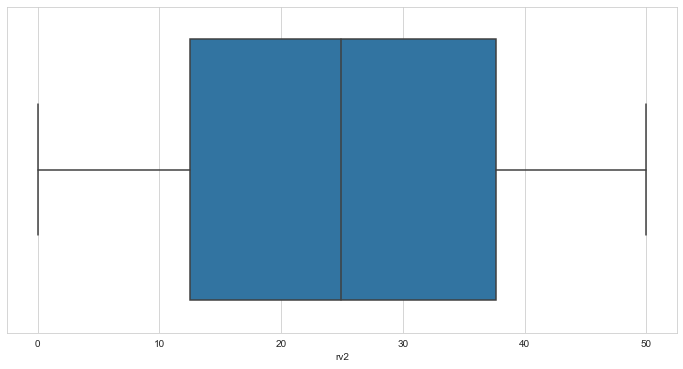

In [16]:
df= train_set.copy()
df = df.drop(['Appliances', 'date', 'lights'], 1)
features = df.columns.values
print(features)
for i in features:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=df,ax= ax)
    plt.show()

Several outliers visible from the boxplots above and will be removed later on

## Benchmark model
A Linear regression model is used with all input attributes and without any prior preprocessing. This will be used to determine any improvements observed after data preprocessing.


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# use a copy of the train and test data to create a benchmark model bm_model
df = train_set.copy()
df['log_Appliances'] = np.log(df['Appliances'])
X = df.drop(['Appliances', 'date', 'log_Appliances'], 1)
y = df.Appliances #train target

df = test_set.copy()
df['log_Appliances'] = np.log(df['Appliances'])
X1 = df.drop(['Appliances', 'date', 'log_Appliances'], 1)
y2 = df.Appliances #test target

reg = LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(X)
y2_pred = reg.predict(X1)
#print the first 3 decimal places of the r2_score values
print('r2_score_train:  {:.3f}%'.format(r2_score(y, y_pred)*100))
print('r2_score_test:  {:.3f}%'.format(r2_score(y2, y2_pred)*100))
mse = mean_squared_error(y_pred, y)
mse2 = mean_squared_error(y2_pred, y2)
rmse = np.sqrt(mse)
rmse2 = np.sqrt(mse2)
print('rmse_train:  {:.3f}'.format(rmse))
print('rmse_test:  {:.3f}'.format(rmse2))

r2_score_train:  16.345%
r2_score_test:  16.930%
rmse_train:  94.329
rmse_test:  91.175


## Data Preprocessing
### Removing all the correlated and redundant features

### feature selection and p-values

In [18]:
# get a new copy of the train data to use in preprocessing
df = train_set.copy()
df['log_Appliances'] = np.log(df['Appliances'])
df = df.drop(['Appliances', 'date'],1)
inputs = df.drop(['log_Appliances'], 1)
target = df.log_Appliances #train target
from sklearn.feature_selection import f_regression
coeff, p_values =f_regression(inputs, target)
results = pd.DataFrame(data= inputs.columns.values, columns = ['features'])
results['p_values'] = p_values.round(3)
print(results)

       features  p_values
0        lights     0.000
1            T1     0.000
2          RH_1     0.000
3            T2     0.000
4          RH_2     0.000
5            T3     0.000
6          RH_3     0.351
7            T4     0.000
8          RH_4     0.498
9            T5     0.000
10         RH_5     0.001
11           T6     0.000
12         RH_6     0.000
13           T7     0.000
14         RH_7     0.000
15           T8     0.000
16         RH_8     0.000
17           T9     0.000
18         RH_9     0.000
19        T_out     0.000
20  Press_mm_hg     0.000
21       RH_out     0.000
22    Windspeed     0.000
23   Visibility     0.376
24    Tdewpoint     0.000
25          rv1     0.370
26          rv2     0.370


* rv1, rv2, T9, visibility, RH_3, RH_4 are going to be dropped because of their high p_values greater than 0.05, rendering them redundant and contibuting significantly less to our model.
* and from the highly correlated pairs we will drop T9, T_out , rv2 and RH_4
* Also date and lights to be removed

### Drop off all un necessary attributes
### removing outliers

In [19]:
df = train_set.copy()
df['log_Appliances'] = np.log(df['Appliances'])
drops = ['Appliances','lights','date','rv1', 'rv2', 'T9', 'Visibility','RH_3', 'RH_4', 'T_out']

df = df.drop(drops, 1)
print(df.head())
print(df.shape)
print(df.columns.values)
from sklearn.base import BaseEstimator, TransformerMixin
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """
    def fit (self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        X=X[(X['T1'] > 18.5) & (X['T1'] < 24.4)].reset_index(drop=True)
        X=X[(X['RH_1'] > 30.0) & (X['RH_1'] < 49.7)].reset_index(drop=True)
        X=X[(X['T2'] <= 23.8)].reset_index(drop=True)
        X=X[(X['RH_2'] >= 31.0) & (X['RH_2'] <= 50.1)].reset_index(drop=True)
        X=X[(X['T3'] <= 26.1)].reset_index(drop=True)
        X=X[(X['RH_5'] >= 24.0)].reset_index(drop=True)
        X=X[(X['T4'] > 15.8) & (X['T4'] < 24.2)].reset_index(drop=True)
        X=X[(X['T5'] < 23.2)].reset_index(drop=True)
        X=X[(X['T6'] <= 19.8)].reset_index(drop=True)
        X=X[(X['T7'] < 25.9)].reset_index(drop=True)
        X=X[(X['RH_7'] <= 48.2)].reset_index(drop=True)
        X=X[(X['T8'] > 17.3)].reset_index(drop=True)
        X=X[(X['RH_8'] <= 55.0)].reset_index(drop=True)
        X=X[(X['RH_9'] >= 30.7) & (X['RH_9'] <= 51.1)].reset_index(drop=True)
        X=X[(X['Press_mm_hg'] >= 736)].reset_index(drop=True)
        X=X[(X['RH_out'] >= 44.4)].reset_index(drop=True)
        X=X[(X['Windspeed'] <= 10.8)].reset_index(drop=True)
        X=X[(X['Tdewpoint'] <= 13.1)].reset_index(drop=True)
        return X
df = RemoveOutliers().fit_transform(df)
print(df.shape)

              T1   RH_1         T2       RH_2         T3     T4         T5  \
2133   19.890000  45.50  19.200000  45.090000  20.390000  19.10  17.511111   
19730  25.566667  46.56  25.890000  42.025714  27.200000  24.70  23.200000   
3288   22.500000  44.43  21.533333  42.590000  21.963333  22.00  19.100000   
7730   19.790000  38.06  17.200000  40.933333  20.600000  18.39  18.290000   
8852   20.600000  35.29  17.100000  39.790000  20.290000  19.50  18.200000   

            RH_5         T6       RH_6     T7   RH_7         T8       RH_8  \
2133   53.000000  11.100000  98.433333  17.50  43.50  18.111111  50.000000   
19730  52.400000  24.796667   1.000000  24.50  44.50  24.700000  50.074000   
3288   55.326667   6.530000  61.463333  19.29  34.32  20.566667  41.331111   
7730   42.260000   2.790000  79.933333  18.10  32.00  20.500000  42.590000   
8852   49.000000  -0.666667  68.530000  20.70  33.59  22.700000  39.260000   

            RH_9  Press_mm_hg     RH_out  Windspeed  Tdewpoint

In [20]:
print(df.shape)
X_train = df.drop('log_Appliances', 1)
y_train = df.log_Appliances
print(X_train.shape, y_train.shape)

(12564, 20)
(12564, 19) (12564,)


#### create pipeline to process numerical and categorical attributes

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

In [22]:
num_features = list(X_train)

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),    
])

scaled_train_inputs = full_pipeline.fit_transform(X_train)


print(scaled_train_inputs.shape)

(12564, 19)


# Train and Testing the model

The following algorithms will be used to train the data:
* Linear Regression
* Support vector regression
* Random Forest Regressor
* Gradient Boosting regressor
* Extra tree regressor

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [24]:
#Transform the test data
df = test_set.copy()
df['log_Appliances'] = np.log(df['Appliances'])
df = df.drop(drops, 1)
print(df.shape)
df = RemoveOutliers().transform(df)
X_test = df.drop('log_Appliances', 1)
y_test = df.log_Appliances

print(X_test.shape, y_test.shape)
scaled_test_inputs = full_pipeline.transform(X_test)
print(scaled_test_inputs.shape)

(3947, 20)
(3149, 19) (3149,)
(3149, 19)


In [25]:
models = [
           ['linear Regression:', LinearRegression()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] 
         ]

In [26]:
#create a function results to display all test and train values in a dataframe
def results():
    import time
    from sklearn.metrics import r2_score
    model_results = []
    for name, active_model in models :
        active_model_data = {}
        active_model.random_state = 42
        active_model_data["Name"] = name
        start = time.time()
        active_model.fit(scaled_train_inputs, y_train)
        end = time.time()
       
        active_model_data["Training_R2_Score"] = r2_score(y_train, active_model.predict(scaled_train_inputs)).round(3)
        active_model_data["Training_Time"] = end - start
        active_model_data["Training_RMSE"] = np.sqrt(mean_squared_error(y_train, active_model.predict(scaled_train_inputs))).round(3)
        active_model_data["Test_Score"] = r2_score(y_test, active_model.predict(scaled_test_inputs)).round(3)
        active_model_data["Test_RMSE"] = np.sqrt(mean_squared_error(y_test, active_model.predict(scaled_test_inputs))).round(3)
        model_results.append(active_model_data)
    model_results = pd.DataFrame(model_results)
    return(model_results)
print(results().set_index(['Name']))


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                             Test_RMSE  Test_Score  Training_R2_Score  \
Name                                                                    
linear Regression:               0.572       0.232              0.225   
SVR:                             0.476       0.469              0.512   
RandomForest                     0.363       0.691              0.940   
ExtraTreeRegressor :             0.323       0.755              1.000   
GradientBoostingRegressor:       0.520       0.367              0.416   

                             Training_RMSE  Training_Time  
Name                                                       
linear Regression:                   0.576       0.096079  
SVR:                                 0.457      15.704907  
RandomForest                         0.160       3.024528  
ExtraTreeRegressor :                 0.000       1.492389  
GradientBoostingRegressor:           0.499       3.042563  


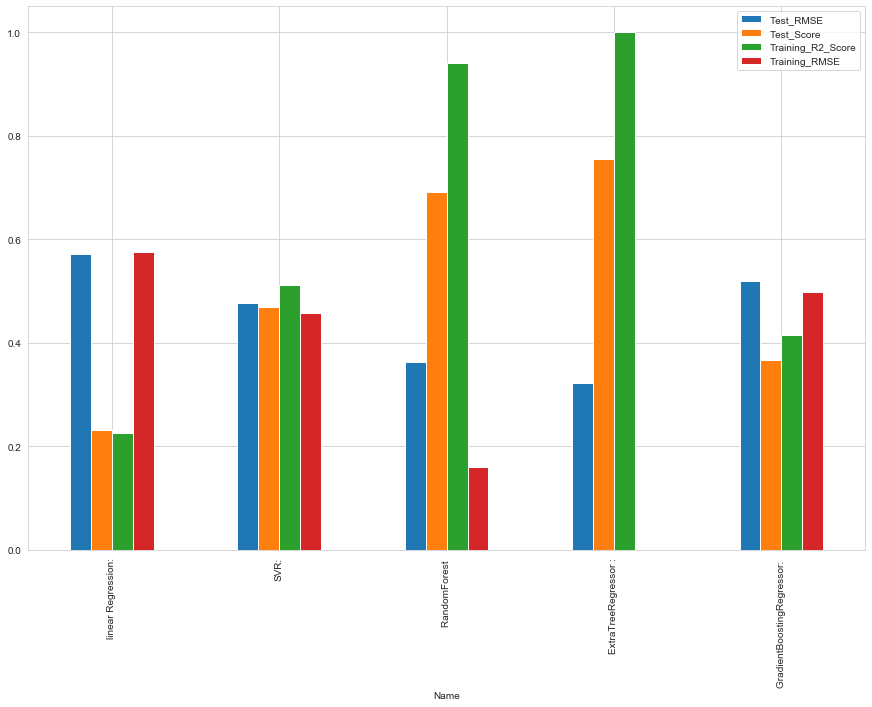

In [27]:
results().columns.values
model_df = results().set_index(['Name'])
model_df = model_df.drop('Training_Time', 1)
model_df.plot(kind='bar', figsize=(15,10))
plt.show()

From the above Training and testing, it can be observed that:
* ExtraTreesRegressor has the highest r2 score and the lowest rmse value which makes it the best model for this project
* SVR comes out as the worst model for this project
* We will hyper tune the extratreesregressor model parameters to improve on its performance and make deductions there after


# fine tune model

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
ext_reg = ExtraTreesRegressor(random_state=42)
param_grid = { 
    'n_estimators': [150,200,250,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None,40,60,80,100]    
}
grid_search = GridSearchCV(ext_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_search.fit(scaled_train_inputs, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='sqrt', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)


In [29]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

0.3546349006315956 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 150}
0.3540971828125576 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}
0.35393380187468915 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 250}
0.35406252197497146 {'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
0.35380885471471596 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 150}
0.35319969433557136 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
0.35294108851042727 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 250}
0.3528600482262314 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}
0.35380885471471596 {'max_depth': None, 'max_features': 'log2', 'n_estimators': 150}
0.35319969433557136 {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
0.35294108851042727 {'max_depth': None, 'max_features': 'log2', 'n_estimators': 250}
0.3528600482262314 {'max_depth': None, 'max_features': 'log2', 'n_es

In [34]:
best_model = grid_search.best_estimator_

# Display metrics on training and test set
print("R2 score on Training set = {:.3f}".format(best_model.score(scaled_train_inputs, y_train)*100))
print("RMSE on Training set = {:.3f}".format(np.sqrt(mean_squared_error(y_train, best_model.predict(scaled_train_inputs)))))
print("R2 score on Testing set = {:.3f}".format(best_model.score(scaled_test_inputs, y_test)*100))
print("RMSE on Testing set = {:.3f}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(scaled_test_inputs)))))

R2 score on Training set = 100.000
RMSE on Training set = 0.000
R2 score on Testing set = 77.848
RMSE on Testing set = 0.307


* An improved score of 77.9% after fine tuning the model

### Feature importance

In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_.round(4)
feature_importances

array([0.0461, 0.0589, 0.0607, 0.0481, 0.0528, 0.0478, 0.0477, 0.0514,
       0.0559, 0.0509, 0.049 , 0.0528, 0.0523, 0.0676, 0.0538, 0.0518,
       0.0577, 0.0458, 0.0488])

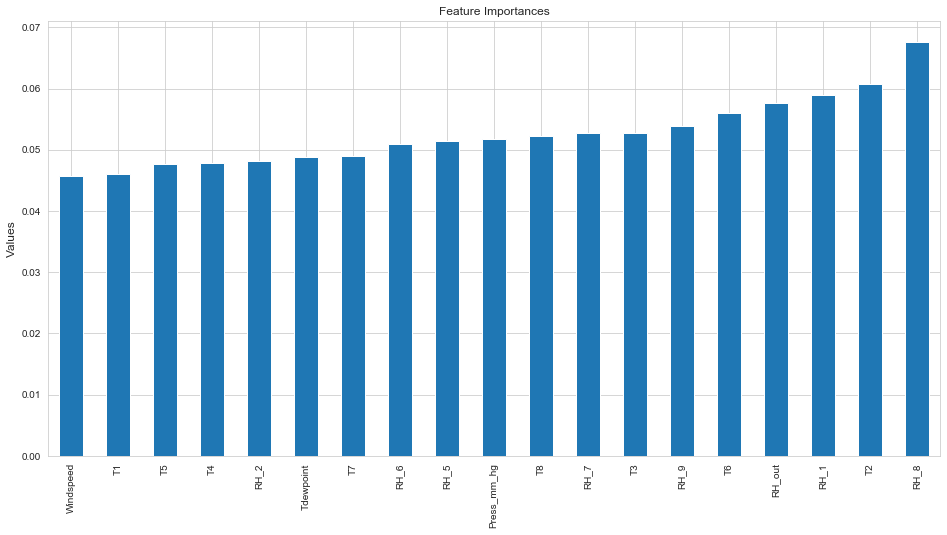

In [31]:
best_model = grid_search.best_estimator_
# Get the indices based on feature importance in ascending order 
feature_indices = np.argsort(best_model.feature_importances_)
# Plot feature importance

fi = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(best_model.feature_importances_))

ax = fi.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

#### Among the 19 attributes considered to be used in this project:
* RH_8 is the most important attributes and
* Windspeed is the least important attribute

## Conclusion 
1. The best Algorithm to use for this dataset Extra Trees Regressor
2. The untuned model was able to explain 75.5% of variance on test set .
3. The tuned model was able to explain 77.9% of varaince on test set which is improvement of 2.3%
4. An improvement of 51.6% can be observed from the benchmark model
5. The final model had 19 features